In [ ]:
import torch
import numpy as np
from torchvision import datasets

: 

#### 使用torchvision API加载 MNIST数据集

In [40]:
# 加载数据
train = datasets.MNIST(root="./data/",
                       train=True,
                       download=True)
test = datasets.MNIST(root='./data/',
                      train=False,
                      download=True)
train_data = np.array(train.data).reshape(len(train), 784)
train_label = np.array(train.train_labels.data)
test_data = np.array(test.data).reshape(len(test), 784)
test_label = np.array(test.test_labels.data)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


/home/lantian/.conda/envs/torch/lib/python3.8/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/lantian/.conda/envs/torch/lib/python3.8/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


#### 使用Decision Tree分类数据并可视化

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy',
                              splitter='random',
                              max_depth=21,
                              min_samples_split=3,
                              random_state=0)
tree.fit(X=train_data,y=train_label)
pred=tree.predict(test_data)
print('accuracy : %.2f' % accuracy_score(pred,test_label))


accuracy : 0.88


(10000, 2)


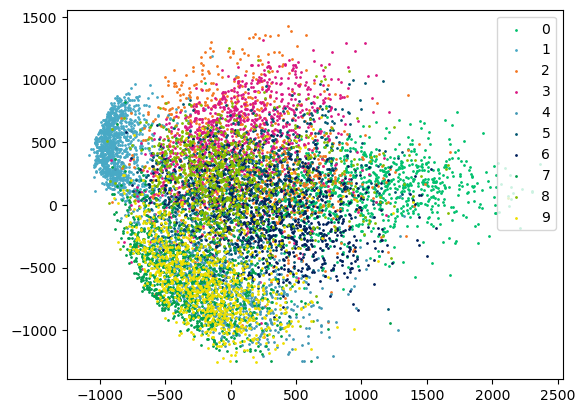

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
color=['#00c16e','#48a9c5','#f47721','#da1884','#4298b5','#005670','#00205b','#009f4d','#84bd00','#efdf00']
# digit=[1,2,3,4,5,6,7,8,9,0]

reduced=PCA(n_components=2).fit_transform(test_data)
pred=tree.predict(test_data)
print(reduced.shape)

handles=[]
labels=[]
plt.figure('visualize')
for i in range(10):
    handle=plt.scatter(reduced[pred==i,0],reduced[pred==i,1],c=color[i],s=1)
    handles.append(handle)
    labels.append(str(i))
plt.legend(handles=handles,labels=labels)
plt.show('visualize')

#### 使用KMeans分类并可视化


(10000, 2)


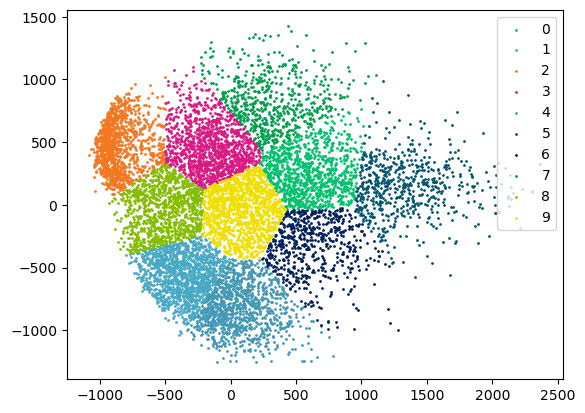

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
color=['#00c16e','#48a9c5','#f47721','#da1884','#4298b5','#005670','#00205b','#009f4d','#84bd00','#efdf00']
# digit=[1,2,3,4,5,6,7,8,9,0]
reduced=PCA(n_components=2).fit_transform(test_data)
kmean = KMeans(n_clusters=10, random_state=0)
kmean.fit(X=reduced)
pred=kmean.predict(X=reduced)
print(reduced.shape)

handles=[]
labels=[]
plt.figure('visualize')
for i in range(10):
    handle=plt.scatter(reduced[pred==i,0],reduced[pred==i,1],c=color[i],s=1)
    handles.append(handle)
    labels.append(str(i))
plt.legend(handles=handles,labels=labels)
plt.show('visualize')